# **TALLER 5 METODOS COMPUTACIONEALES 2**

# Punto 1


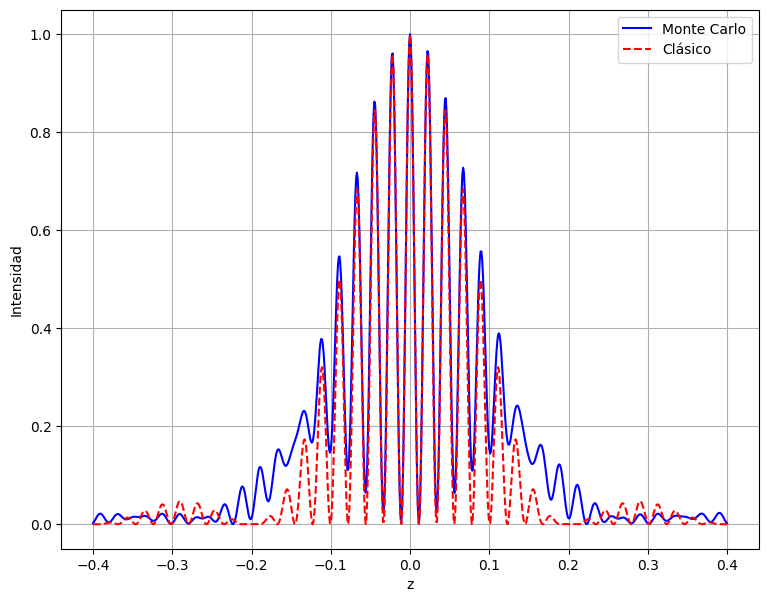

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100_000
A = 0.1
x_muestras = np.random.uniform(-A/2, A/2, N)


a = 0.01
d = 0.09

# Generar N/2 muestras para cada rendija
N_half = N // 2
y_muestras = np.zeros(N)

# Primera rendija
y_muestras[:N_half] = np.random.uniform(-d/2 - a/2, -d/2 + a/2, N_half)

# Segunda rendija
y_muestras[N_half:] = np.random.uniform(d/2 - a/2, d/2 + a/2, N - N_half)


def calcular_intensidad(valores_z, x_muestras, y_muestras, lambda_, D1, D2):
    intensidades = []
    k1 = np.pi / (lambda_ * D1)
    k2 = np.pi / (lambda_ * D2)

    for z in z_valores:
        fase = k1 * (x_muestras - y_muestras)**2 + k2 * (z - y_muestras)**2
        complejos = np.exp(1j * fase)
        S = np.sum(complejos) / N
        intensidad = np.abs(S)**2
        intensidades.append(intensidad)

    return np.array(intensidades)

lambda_ = 6.7e-5
D1 = D2 = 30

z_valores = np.linspace(-0.4, 0.4, 801)

intensidades_mc = calcular_intensidad(z_valores, x_muestras, y_muestras, lambda_, D1, D2)

def intensidad_clasc(z_valores, a, d, lambda_, D2):
    theta = np.arctan(z_valores / D2)
    sin_theta = np.sin(theta)
    beta = (np.pi * d * sin_theta) / lambda_
    gamma = (np.pi * a * sin_theta) / lambda_
    intensidad = (np.cos(beta))**2 * (np.sinc(gamma / np.pi))**2
    return intensidad

intensidades_clasc = intensidad_clasc(z_valores, a, d, lambda_, D2)


intensidades_mc_norm = intensidades_mc / np.max(intensidades_mc)
intensidades_clasc_norm = intensidades_clasc / np.max(intensidades_clasc)

plt.figure(figsize=(9, 7))
plt.plot(z_valores, intensidades_mc_norm, label='Monte Carlo', linestyle='-', color='blue')
plt.plot(z_valores, intensidades_clasc_norm, label='Clásico', linestyle='--', color='red')
plt.xlabel('z')
plt.ylabel('Intensidad')
plt.legend()
plt.grid(True)
plt.show()

# Punto 2

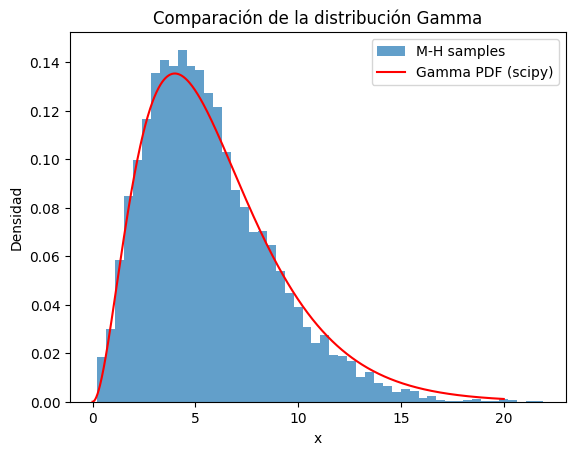

(3.67030997215642, -0.3133576139178681, 1.6266137473287265)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

alpha = 3.0
beta = 2.0
N = 10000


def distribucion_objetivo(x, alpha, beta):
    if x <= 0:
        return 0
    return x**(alpha - 1) * np.exp(-x / beta)


def metropolis_hastings(alpha, beta, N, ancho_propuesta):
    samples = []
    x = np.random.uniform(0, 10)

    for _ in range(N):
        x_propuesta = np.random.normal(x, ancho_propuesta)

        aceptacion_ratio = distribucion_objetivo(x_propuesta, alpha, beta) / distribucion_objetivo(x, alpha, beta)

        if np.random.rand() < aceptacion_ratio:
            x = x_propuesta

        samples.append(x)

    return np.array(samples)


ancho_propuesta = 1.0
samples = metropolis_hastings(alpha, beta, N, ancho_propuesta)

plt.hist(samples, bins=50, density=True, alpha=0.7, label='M-H samples')

x = np.linspace(0, 20, 1000)
plt.plot(x, gamma.pdf(x, a=alpha, scale=beta), label='Gamma PDF (scipy)', color='red')

plt.title('Comparación de la distribución Gamma')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

fitted_params = gamma.fit(samples)
fitted_params


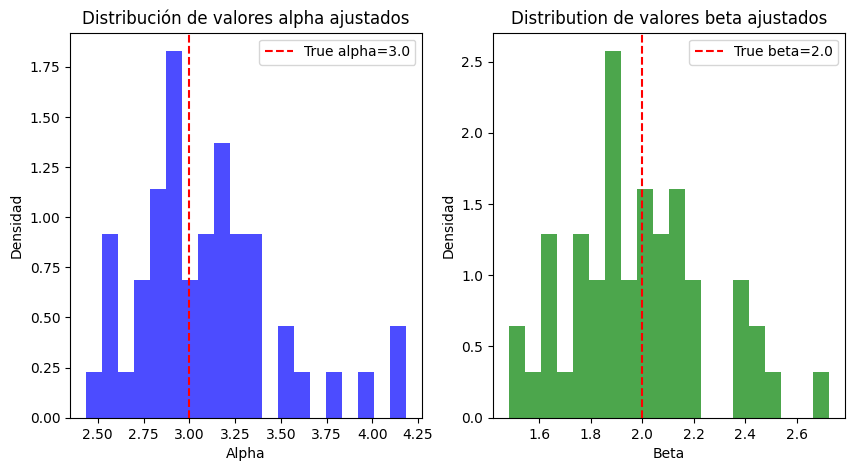

In [ ]:
n_experimentos = 50
fit_alpha_vals = []
fit_beta_vals = []

for _ in range(n_experimentos):
    samples = metropolis_hastings(alpha, beta, N, ancho_propuesta)
    fitted_params = gamma.fit(samples)
    fit_alpha_vals.append(fitted_params[0])
    fit_beta_vals.append(fitted_params[2])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(fit_alpha_vals, bins=20, density=True, alpha=0.7, color='blue')
plt.axvline(alpha, color='red', linestyle='--', label=f'True alpha={alpha}')
plt.title('Distribución de valores alpha ajustados')
plt.xlabel('Alpha')
plt.ylabel('Densidad')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(fit_beta_vals, bins=20, density=True, alpha=0.7, color='green')
plt.axvline(beta, color='red', linestyle='--', label=f'True beta={beta}')
plt.title('Distribution de valores beta ajustados')
plt.xlabel('Beta')
plt.ylabel('Densidad')
plt.legend()

plt.show()


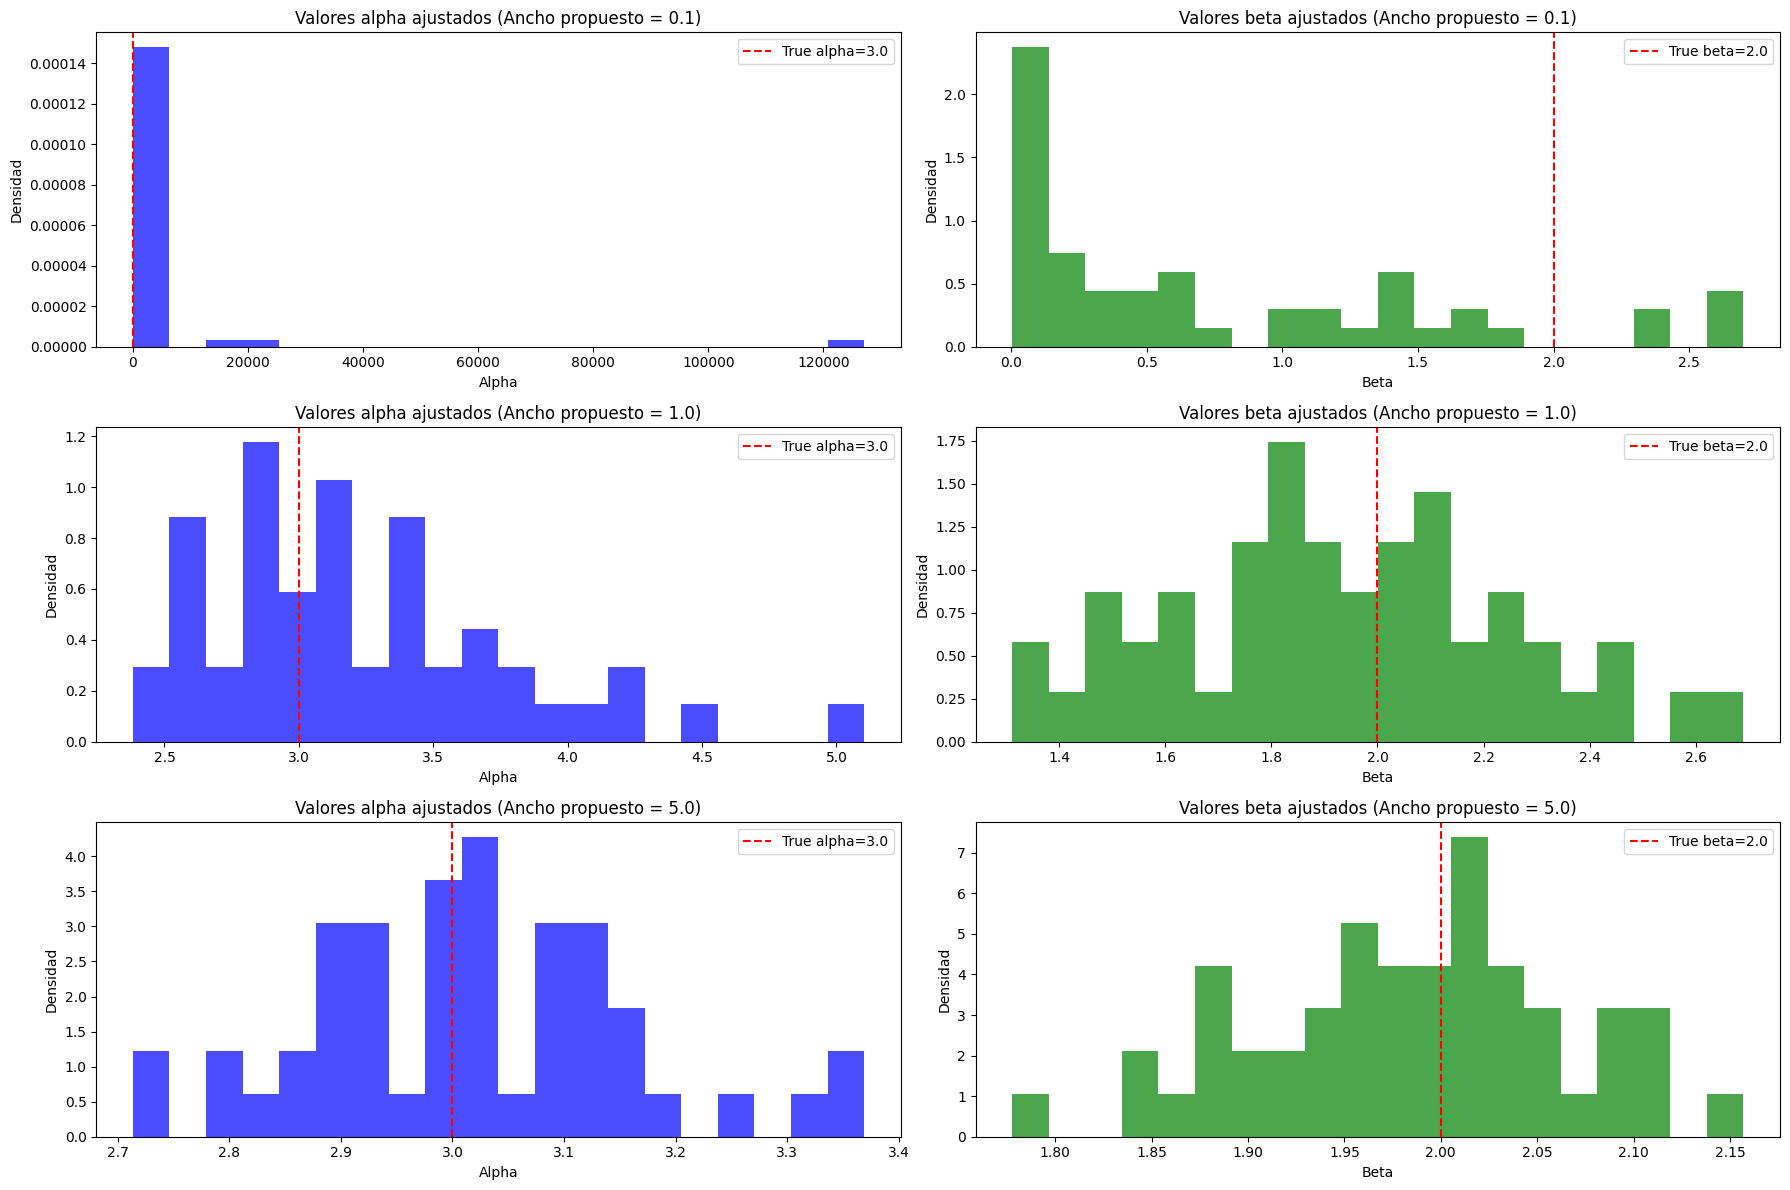

In [ ]:
anchos_propuestos = [0.1, 1.0, 5.0]
n_experimentos = 50
fit_alpha_vals_ancho = {w: [] for w in anchos_propuestos}
fit_beta_vals_ancho = {w: [] for w in anchos_propuestos}

for w in anchos_propuestos:
    for _ in range(n_experimentos):
        samples = metropolis_hastings(alpha, beta, N, w)
        fitted_params = gamma.fit(samples)
        fit_alpha_vals_ancho[w].append(fitted_params[0])
        fit_beta_vals_ancho[w].append(fitted_params[2])

plt.figure(figsize=(18, 12))

for i, w in enumerate(anchos_propuestos):
    plt.subplot(3, 2, 2*i + 1)
    plt.hist(fit_alpha_vals_ancho[w], bins=20, density=True, alpha=0.7, color='blue')
    plt.axvline(alpha, color='red', linestyle='--', label=f'True alpha={alpha}')
    plt.title(f'Valores alpha ajustados (Ancho propuesto = {w})')
    plt.xlabel('Alpha')
    plt.ylabel('Densidad')
    plt.legend()

    plt.subplot(3, 2, 2*i + 2)
    plt.hist(fit_beta_vals_ancho[w], bins=20, density=True, alpha=0.7, color='green')
    plt.axvline(beta, color='red', linestyle='--', label=f'True beta={beta}')
    plt.title(f'Valores beta ajustados (Ancho propuesto = {w})')
    plt.xlabel('Beta')
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()


# Punto 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 150
J = 0.2
beta = 10

spins = np.random.choice([-1, 1], size=(N, N))

def energia_loc(spins, i, j, J):
    N = len(spins)
    left = spins[i, (j-1)%N]
    right = spins[i, (j+1)%N]
    up = spins[(i-1)%N, j]
    down = spins[(i+1)%N, j]

    return -J * spins[i, j] * (left + right + up + down)

def metropolis_paso(spins, J, beta):
    N = len(spins)
    i, j = np.random.randint(0, N, 2)

    E_vieja = energia_loc(spins, i, j, J)
    spins[i, j] *= -1
    E_nueva= energia_loc(spins, i, j, J)

    delta_E = E_nueva - E_vieja

    if delta_E > 0 and np.random.rand() >= np.exp(-beta * delta_E):
        spins[i, j] *= -1

def evoluc(spins, J, beta, iteraciones):
    for _ in range(iteraciones):
        metropolis_paso(spins, J, beta)

fig, ax = plt.subplots()
cax = ax.matshow(spins, cmap='coolwarm')

def update(frame):
    evoluc(spins, J, beta, 400)  # 400 iteraciones entre frames
    cax.set_data(spins)
    return [cax]

ani = animation.FuncAnimation(fig, update, frames=500, blit=True,interval=20)
ani.save('ising_model.mp4', writer='ffmpeg')

plt.close(fig)

In [ ]:
from IPython.display import Video
Video("ising_model.mp4", embed=True)

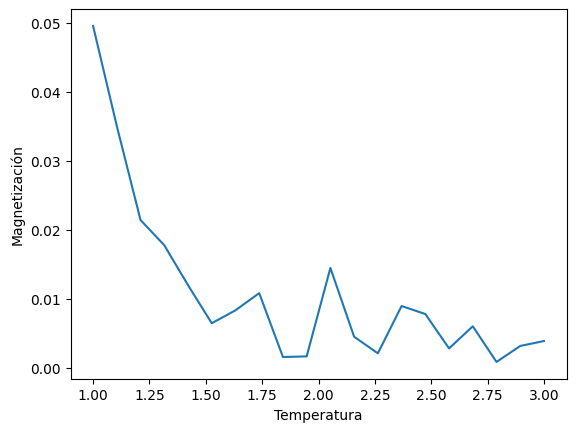

In [ ]:
from scipy.ndimage import label

def tamaño_promedio(spins):
    labeled_array, num_features = label(spins == 1)
    tamaños = np.bincount(labeled_array.ravel())
    return tamaños[1:].mean() if len(tamaños) > 1 else 0

def magnetizacion(spins):
    return np.abs(spins.sum()) / spins.size

temperaturas = np.linspace(1, 3, 20)  # Rango de temperaturas
magnetizaciones = []

for T in temperaturas:
    beta = 1.0 / T
    evoluc(spins, J, beta, 10000)
    mag = magnetizacion(spins)
    magnetizaciones.append(mag)

plt.plot(temperaturas, magnetizaciones)
plt.xlabel('Temperatura')
plt.ylabel('Magnetización')
plt.show()


# Punto 4

In [ ]:
import pandas as pd
import numpy as np

s = "GTCTTAAAAGGCGCGGGTAAGGCCTTGTTCAACACTTGTCCCGTA"
atoms = list("ACGT")

F = pd.DataFrame(np.zeros((4, 4), dtype=int), index=atoms, columns=atoms)
for i in range(len(s) - 1):
    F.loc[s[i], s[i+1]] += 1

P = F / F.sum(axis=1).values[:, None]

ultima_letra = "G"
nueva_letra = np.random.choice(atoms, p=P.loc[ultima_letra].values)

def generar_cadena(modelo_prob, semilla, longitud):
    resultado = semilla
    actual = semilla[-1]

    for _ in range(longitud - len(semilla)):
        siguiente_letra = np.random.choice(atoms, p=modelo_prob.loc[actual].values)
        resultado += siguiente_letra
        actual = siguiente_letra
    return resultado

semilla = "A"
cadena_generada = generar_cadena(P, semilla, 100)
print(f"\nCadena generada: {cadena_generada}")


Cadena generada: AAAAAAAGGCACCCGCGTGTCTCTTGGTCGCTCTAGTACGTAGTAGTAAGGGGTACCGTCCGGGGCGTTTAAAAAAACAAAAACCGTGGGTGTAAGTCTA


In [ ]:
import re
from collections import defaultdict
import numpy as np
import random

with open('oliver_twist.txt', 'r', encoding='utf-8') as file:
    texto = file.read()

texto = texto.replace("\r\n", "\n").replace("\n\n", "#").replace("\n", " ").replace("#", "\n\n")

texto = re.sub(r'[^\w\s]', '', texto)
texto = re.sub(r'\s+', ' ', texto)
texto = texto.lower()

texto = texto[5406:]

print(texto[:500])

chapter i treats of the place where oliver twist was born and of the circumstances attending his birth among other public buildings in a certain town which for many reasons it will be prudent to refrain from mentioning and to which i will assign no fictitious name there is one anciently common to most towns great or small to wit a workhouse and in this workhouse was born on a day and date which i need not trouble myself to repeat inasmuch as it can be of no possible consequence to the reader in 


In [ ]:
def entrenar(documento, N):
    frecuencias = defaultdict(lambda: defaultdict(int))

    for i in range(len(documento) - N):
        caracteres = documento[i:i+N]
        siguiente_caracter = documento[i+N]
        frecuencias[caracteres][siguiente_caracter] += 1

    probabilidades = {}
    for caracteres, siguiente_caracteres in frecuencias.items():
        total = sum(siguiente_caracteres.values())
        probabilidades[caracteres] = {char: count/total for char, count in siguiente_caracteres.items()}

    return probabilidades

def generar_texto(modelo, m=1500, N=4):
    caracteres_inicio = [caracteres for caracteres in modelo if caracteres.startswith('\n')]
    caracteres_actual = random.choice(caracteres_inicio) if caracteres_inicio else random.choice(list(modelo.keys()))

    texto_generado = caracteres_actual

    for i in range(m - N):
        try:
            siguiente_char = np.random.choice(
                list(modelo[caracteres_actual].keys()),
                p=list(modelo[caracteres_actual].values())
            )
            texto_generado += siguiente_char
            caracteres_actual = texto_generado[-N:]
        except KeyError:

            caracteres_actual = random.choice(list(modelo.keys()))
            texto_generado += caracteres_actual[-1]

    return texto_generado

modelo_caracteres = entrenar(texto, N=4)

texto_nuevo = generar_texto(modelo_caracteres, m=1500)
print("El texto generado es:")
print(texto_nuevo)

El texto generado es:
ainful accountry said the name althout him hat dirty were it is not thing too you porochial thing who welled to rejoined for in never is articular chapter the crowd and nancy sparent up into altogethe old the your money all and dent of the pocketknife thrust have follow whats of the mindescend to well started and carefully to street measleeping old gently child was cover urgeon befores and ten if they said the gall threw stression of the sliceman aliver has to planate therest gentleman before courself attractive mens in quests you truth about of the was impatience expatiency interview who will the cording by a leetle gang oliversatisfact of life having to keep me house are youre man olivers if you see into one had kep mistreet ladypity their in mr looks observant corpse now of his both whispered out the is indeed by me and down to the old sworn in cod it with all parish birds too get upon a bow were lady deal injure extenuation unless offended man invitably i must

In [ ]:
import re
from collections import defaultdict
import numpy as np
import random

with open('words_alpha.txt', 'r') as file:
    ingles = set(file.read().splitlines())

def entrenar(documento, N):
    frecuencias = defaultdict(lambda: defaultdict(int))

    for i in range(len(documento) - N):
        caracteres = documento[i:i+N]
        siguiente_caracter = documento[i+N]
        frecuencias[caracteres][siguiente_caracter] += 1

    probabilidades = {}
    for caracteres, siguiente_caracteres in frecuencias.items():
        total = sum(siguiente_caracteres.values())
        probabilidades[caracteres] = {char: count/total for char, count in siguiente_caracteres.items()}

    return probabilidades

def generar_texto(modelo, m=1500, N=4):
    caracteres_inicio = [caracteres for caracteres in modelo if caracteres.startswith('\n')]
    caracteres_actual = random.choice(caracteres_inicio) if caracteres_inicio else random.choice(list(modelo.keys()))

    texto_generado = caracteres_actual

    for i in range(m - N):
        try:
            siguiente_char = np.random.choice(
                list(modelo[caracteres_actual].keys()),
                p=list(modelo[caracteres_actual].values())
            )
            texto_generado += siguiente_char
            caracteres_actual = texto_generado[-N:]
        except KeyError:
            caracteres_actual = random.choice(list(modelo.keys()))
            texto_generado += caracteres_actual[-1]

    return texto_generado

def porcentaje_palabras(texto, ingles):
    palabras_generadas = re.findall(r'\b\w+\b', texto)
    palabras_correctas = [palabra for palabra in palabras_generadas if palabra in ingles]

    return len(palabras_correctas) / len(palabras_generadas) * 100 if palabras_generadas else 0

for n in range(1, 8):
    modelo_caracteres = entrenar(texto, N=n)
    texto_generado = generar_texto(modelo_caracteres, m=1500, N=n)

    porcentaje_correcto = porcentaje_palabras(texto_generado, ingles)

    print(f"Texto generado con n = {n}:")
    print(texto_generado)
    print()
    print(f"Porcentaje de palabras correctas para n = {n}: {porcentaje_correcto:.2f}%")
    print("\n" + "="*80 + "\n")

Texto generado con n = 1:
qur ly ouninedny as neier vel thind wn imlin th m onghe mboblthitojuthilearle sint us s ie setok w tou r nte ig tl pe hewont anomby tas theped t nerfint in uco ngant anshef o r there o os w atrontewioueshaseryepire ormacquthevengof s mod heman glosigele fed oum tifimege f thine wave tindewe h ofithr wehteespst tasele si o cotheatif and is mansh ve hind beno berss anbaves wio webero serd f t arintrtheneershand ulve apassin antlof rrousher thar fre 1e s we alke tseaind ag haito dd dispalk ma athe olly mbedmed erthar ce an ac thean to lyove atedorewikwait was ar bou blanthas s od es h veroo hepr d heamberilanofin theas he wattutyo sm asperdl br yotrs t id g quchyo h winearangher iner bow sat thetildi chis t the y o thaganischry red fow ond sng whe y m omer jod f therohel ure bo itlig blourepicthecry wonde blockersar ng nghtofisay hen in ticrkeroms rt allyoucoma m tus lery of med habel our i oks o on d basoat inay ly byo pph flfonthollaileadin ove o orifthofreicer

* A partir de los resultados obtenidos, considero que con n=5 el texto generado comienza a ser legible y presenta algo de coherencia. Además, se observa un aumento significativo en el porcentaje de palabras correctas en inglés a partir de este valor. Esto indica que un modelo basado en n-gramas de longitud 5 o superior tiene mayor capacidad para capturar patrones de texto y producir frases más comprensibles.
* En efecto tipo de libro y el idioma, estos factores afectan el rendimiento del modelo. Por ejemplo, las novelas suelen seguir una narrativa más estructurada, lo que facilita la generación de frases coherentes, a diferencia de otros géneros como la poesía, donde la estructura es más flexible y un poco menos predecible.
* Algunas cosas que serían necesarias para que pudiera mantener una conversación, sería necesario por ejemplo, entrenarlo con diálogos y ejemplos de conversaciones naturales mejoraría su capacidad de generar interacciones más realistas. También sería fundamental incorporar técnicas de análisis sintáctico y semántico

# Punto 5

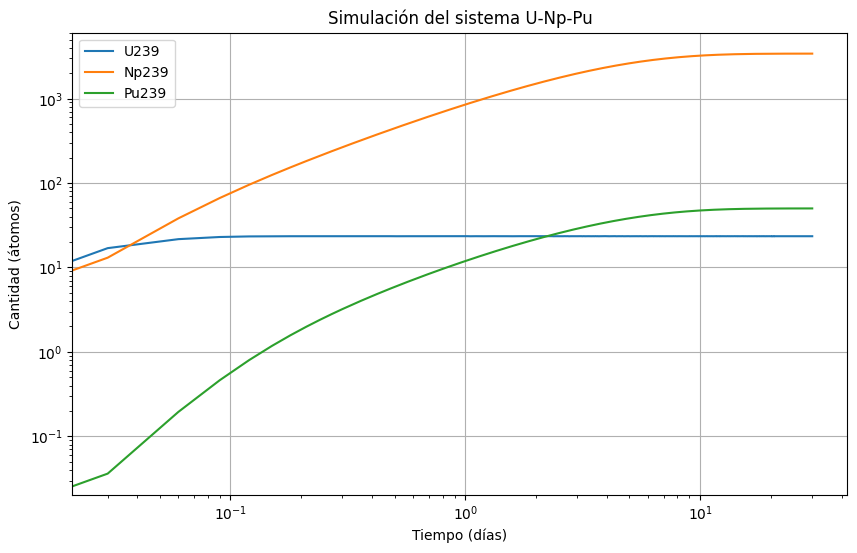

El sistema no ha alcanzado un estado estable en 30 días.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
A = 1000  # producción de U por día
B = 20    # tasa de extracción de Pu por día
lambda_U = np.log(2) / 0.01625  # Constante de decaimiento de U (1/día)
lambda_Np = np.log(2) / 2.36    # Constante de decaimiento de Np (1/día)

# Sistema de ecuaciones diferenciales
def sistema(t, y):
    U, Np, Pu = y
    dU_dt = A - lambda_U * U
    dNp_dt = lambda_U * U - lambda_Np * Np
    dPu_dt = lambda_Np * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]

# Condiciones iniciales (planta vacía al inicio)
y0 = [0, 0, 0]

# Simulación durante 30 días
t_span = [0, 30]
t_eval = np.linspace(0, 30, 1000)  # Tiempo de evaluación para obtener detalles

# Resolver el sistema de ecuaciones
sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='RK45')

# Extraer resultados
U = sol.y[0]
Np = sol.y[1]
Pu = sol.y[2]
t = sol.t

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, U, label='U239')
plt.plot(t, Np, label='Np239')
plt.plot(t, Pu, label='Pu239')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad (átomos)')
plt.title('Simulación del sistema U-Np-Pu')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Detección automática de estado estable
tolerancia = 1e-3
dU = np.abs(np.diff(U))
dNp = np.abs(np.diff(Np))
dPu = np.abs(np.diff(Pu))

estable_U = np.all(dU[-10:] < tolerancia)
estable_Np = np.all(dNp[-10:] < tolerancia)
estable_Pu = np.all(dPu[-10:] < tolerancia)

if estable_U and estable_Np and estable_Pu:
    print(f"El sistema llega a un estado estable después de {t[-10]} días.")
else:
    print("El sistema no ha alcanzado un estado estable en 30 días.")


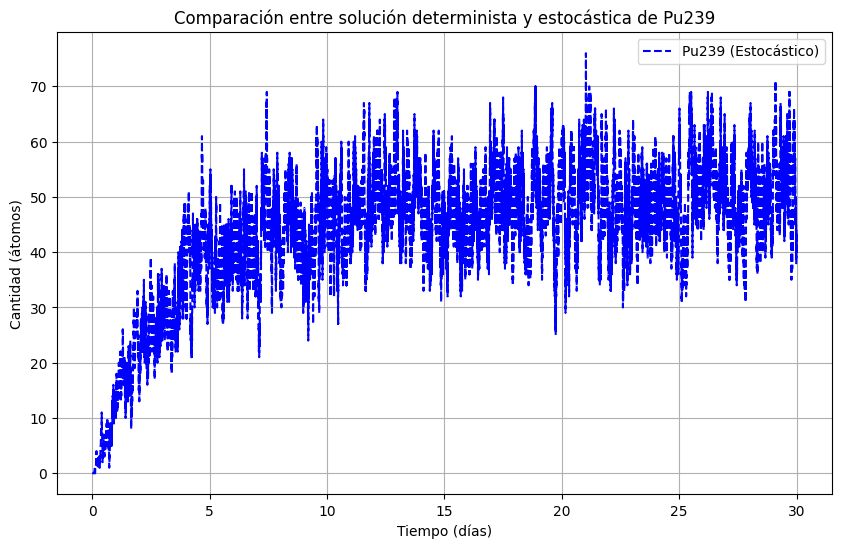

  0%|          | 0/100 [00:00<?, ?it/s]

Probabilidad de que Pu >= 80: 0.1300


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes del problema
A = 1000  # producción diaria de U239
B = 20    # extracción diaria de Pu239
lambda_U = np.log(2) / 0.01625  # Constante de decaimiento de U (1/día)
lambda_Np = np.log(2) / 2.36    # Constante de decaimiento de Np (1/día)
t_max = 30  # tiempo máximo en días

# Función para simular el sistema estocástico usando el algoritmo de Gillespie
def gillespie_simulation():
    t = 0
    U, Np, Pu = 0, 0, 0  # Estado inicial vacío
    t_values = [t]
    U_values = [U]
    Np_values = [Np]
    Pu_values = [Pu]

    while t < t_max:
        # Recalcular las tasas
        tasas = [A, lambda_U * U, lambda_Np * Np, B * Pu]
        tasa_total = sum(tasas)

        if tasa_total == 0:
            break

        # Tiempo hasta la siguiente reacción
        tau = np.random.exponential(1 / tasa_total)
        t += tau

        # Elegir cuál reacción ocurre
        evento = np.random.choice([0, 1, 2, 3], p=np.array(tasas) / tasa_total)

        # Aplicar el evento
        if evento == 0:  # Producción de U
            U += 1
        elif evento == 1:  # Decaimiento de U en Np
            U -= 1
            Np += 1
        elif evento == 2:  # Decaimiento de Np en Pu
            Np -= 1
            Pu += 1
        elif evento == 3:  # Extracción de Pu
            Pu -= 1

        # Guardar el estado del sistema
        t_values.append(t)
        U_values.append(U)
        Np_values.append(Np)
        Pu_values.append(Pu)

    return np.array(t_values), np.array(U_values), np.array(Np_values), np.array(Pu_values)

# Simulación estocástica
t_stoch, U_stoch, Np_stoch, Pu_stoch = gillespie_simulation()

# Graficar comparación con la solución determinista previamente calculada
plt.figure(figsize=(10, 6))
plt.plot(t_stoch, Pu_stoch, label='Pu239 (Estocástico)', color='blue', linestyle='--')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad (átomos)')
plt.title('Comparación entre solución determinista y estocástica de Pu239')
plt.legend()
plt.grid(True)
plt.show()

# Parte b: simulaciones para calcular la probabilidad de que Pu >= 80
n_simulaciones = 100
conteo_pu_alto = 0

from tqdm.notebook import tqdm

for _ in tqdm(range(n_simulaciones)):
    _, _, _, Pu_stoch = gillespie_simulation()
    if np.max(Pu_stoch) >= 80:
        conteo_pu_alto += 1

probabilidad_pu_alto = conteo_pu_alto / n_simulaciones
print(f'Probabilidad de que Pu >= 80: {probabilidad_pu_alto:.4f}')

# Cambiar parámetros para disminuir la probabilidad de Pu >= 80
# Podemos aumentar la tasa de extracción B o disminuir la producción A.
